In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [2]:
df=pd.read_csv('energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df['date'] = pd.to_datetime(df['date'])
df= df.sort_values(['date'])
df.set_index('date', inplace=True)
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [5]:
df.drop(['rv1', 'rv2'],axis=1,inplace=True)

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [7]:
df.columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint']
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667


In [8]:
from sklearn.preprocessing import MinMaxScaler
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled 

array([[0.04672897, 0.42857143, 0.32734952, ..., 0.5       , 0.95384615,
        0.53846154],
       [0.04672897, 0.42857143, 0.32734952, ..., 0.47619048, 0.89487179,
        0.53393665],
       [0.03738318, 0.42857143, 0.32734952, ..., 0.45238095, 0.83589744,
        0.52941176],
       ...,
       [0.24299065, 0.14285714, 0.91974657, ..., 0.26190476, 0.37435897,
        0.89894419],
       [0.38317757, 0.14285714, 0.91974657, ..., 0.27380952, 0.38717949,
        0.8974359 ],
       [0.39252336, 0.14285714, 0.91974657, ..., 0.28571429, 0.4       ,
        0.8959276 ]])

In [9]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True,feat_name=None):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{feat_name[j]}(t-{i})' for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{feat_name[j]}(t)' for j in range(n_vars)]
        else:
            names += [f'{feat_name[j]}(t+{i})' for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [10]:
n_out=1
n_in=10
reframed = series_to_supervised(scaled, n_in, n_out,feat_name=df.columns)
reframed.drop(['T1(t)', 'RH_1(t)', 'T2(t)',
       'RH_2(t)', 'T3(t)', 'RH_3(t)', 'T4(t)', 'RH_4(t)', 'T5(t)', 'RH_5(t)',
       'T6(t)', 'RH_6(t)', 'T7(t)', 'RH_7(t)', 'T8(t)', 'RH_8(t)', 'T9(t)',
       'RH_9(t)', 'T_out(t)', 'Press_mm_hg(t)', 'RH_out(t)', 'Windspeed(t)',
       'Visibility(t)', 'Tdewpoint(t)'],axis=1,inplace=True)
reframed

,Appliances(t-10),lights(t-10),T1(t-10),RH_1(t-10),T2(t-10),RH_2(t-10),T3(t-10),RH_3(t-10),T4(t-10),RH_4(t-10),...,T9(t-1),RH_9(t-1),T_out(t-1),Press_mm_hg(t-1),RH_out(t-1),Windspeed(t-1),Visibility(t-1),Tdewpoint(t-1),Appliances(t),lights(t)
10,0.046729,0.428571,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.219563,0.667357,0.352090,0.116279,0.888158,0.392857,0.600000,0.509050,0.205607,1.000000
11,0.046729,0.428571,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.219563,0.667357,0.352626,0.117829,0.885965,0.404762,0.600000,0.508296,0.532710,0.857143
12,0.037383,0.428571,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.208117,0.667357,0.353162,0.119380,0.883772,0.416667,0.600000,0.507541,0.392523,0.714286
13,0.037383,0.571429,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.215747,0.667357,0.353698,0.120930,0.881579,0.428571,0.600000,0.506787,0.224299,0.571429
14,0.046729,0.571429,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.208117,0.668874,0.353698,0.123643,0.875000,0.428571,0.600000,0.503017,0.084112,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.056075,0.000000,0.919747,0.509105,0.726920,0.578914,0.913925,0.534351,0.864865,0.747048,...,0.864724,0.727580,0.896034,0.602326,0.412281,0.226190,0.335897,0.903469,0.084112,0.000000
19731,0.084112,0.000000,0.919747,0.512155,0.725466,0.582979,0.908386,0.537155,0.864865,0.752881,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.074766,0.000000
19732,0.084112,0.000000,0.919747,0.514815,0.719651,0.589518,0.905616,0.545256,0.864865,0.758572,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.242991,0.142857
19733,0.074766,0.000000,0.919747,0.516466,0.719651,0.594058,0.905616,0.551176,0.864865,0.761417,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.383178,0.142857


In [11]:
split_train =int(reframed.shape[0]*0.6)
split_test = int(reframed.shape[0]*(0.6+0.2))
    
train = reframed[:split_train]
test = reframed[split_train:split_test]
forecast = reframed[split_test:]

In [12]:
test.shape

(3945, 262)

In [13]:
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(max_train_size=None, n_splits=3)
i=0
for train_val, test_val in cv.split(train):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train_val)))
    print ("No of observations under val%s=%s" % (i, len(test_val)))

No of observations under train1=2961
No of observations under val1=2958
No of observations under train2=5919
No of observations under val2=2958
No of observations under train3=8877
No of observations under val3=2958


In [14]:
train1, val1 = train[:2961], train[2961:5919]
train2, val2 = train[:5919], train[5919:8877]
train3, val3 = train[:8877], train[8877:8877+2958]

In [15]:
cv_train=[train1,train2,train3]
cv_test=[val1,val2,val3]

In [16]:
cv_xtrain=[]
cv_ytrain=[]
cv_xtest=[]
cv_ytest=[]
for i in range(3):
    train_X, train_y = cv_train[i].values[:, :-2], cv_train[i].values[:, -2:]
    cv_xtrain.append(train_X)
    cv_ytrain.append(train_y)
    test_X, test_y = cv_test[i].values[:, :-2], cv_test[i].values[:, -2:]
    cv_xtest.append(test_X)
    cv_ytest.append(test_y)    

In [17]:
cv_train[0].shape

(2961, 262)

In [18]:
train_X, train_y = train.values[:, :-2], train.values[:, -2:]
test_X, test_y = test.values[:, :-2], test.values[:, -2:]
forecast_X,forecast_y = forecast.values[:, :-2], forecast.values[:, -2:]

In [19]:
x_train=[cv_xtrain[0],cv_xtrain[1],cv_xtrain[2],train_X]
y_train=[cv_ytrain[0],cv_ytrain[1],cv_ytrain[2],train_y]
x_test=[cv_xtest[0],cv_xtest[1],cv_xtest[2],test_X]
y_test=[cv_ytest[0],cv_ytest[1],cv_ytest[2],test_y]

# Train Model

In [20]:
for i in range(len(x_train)):
    svr = SVR(kernel='linear',C=100)
    svr = MultiOutputRegressor(svr)
    svr.fit(x_train[i],y_train[i])
    if i == len(x_train):
        break

In [21]:
yhat = svr.predict(forecast_X)

In [22]:
td=[]
for i in range(24):
    ts=forecast_X[::,(i+2)]
    ts=ts.reshape(len(forecast_X),1)
    td.append(ts)
inv_yhat = np.hstack((yhat,td[0],td[1],td[2],td[3],td[4],td[5],td[6],td[7],td[8],td[9],td[10],td[11],td[12],td[13],td[14],td[15],td[16],td[17],td[18],td[19],td[20],td[21],td[22],td[23]))
inv_yhat = pd.DataFrame(inv_yhat,columns=df.columns)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat= inv_yhat[:,0:2] 
inv_yforecast=np.hstack((forecast_y,td[0],td[1],td[2],td[3],td[4],td[5],td[6],td[7],td[8],td[9],td[10],td[11],td[12],td[13],td[14],td[15],td[16],td[17],td[18],td[19],td[20],td[21],td[22],td[23]))
inv_yforecast = pd.DataFrame(inv_yforecast,columns=df.columns)
inv_yforecast = scaler.inverse_transform(inv_yforecast)
inv_yforecast = inv_yforecast[:,0:2]

In [23]:
inv_yhat

array([[427.83575595,   4.92752809],
       [208.89578924,   1.74833303],
       [294.14222256,   5.90247591],
       ...,
       [134.32446478,   5.08046872],
       [277.38327125,  10.51886293],
       [296.3023237 ,  12.6322717 ]])

In [24]:
inv_yforecast 

array([[320.,   0.],
       [310.,  10.],
       [260.,   0.],
       ...,
       [270.,  10.],
       [420.,  10.],
       [430.,  10.]])

# Error

In [25]:
rmse1= np.sqrt(mean_squared_error(inv_yforecast, inv_yhat))
r21=r2_score(inv_yforecast, inv_yhat)
print('Test RMSE: %.3f' % rmse1)
print('Test R2-score: %.3f' % r21)

Test RMSE: 58.208
Test R2-score: 0.113


In [26]:
rmse1_Appliances= np.sqrt(mean_squared_error(inv_yforecast [::,0], inv_yhat[::,0]))
r21_Appliances=r2_score(inv_yforecast [::,0], inv_yhat[::,0])
print('Test RMSE: %.3f' % rmse1_Appliances)
print('Test R2-score: %.3f' % r21_Appliances)

Test RMSE: 82.145
Test R2-score: 0.178


In [27]:
rmse1_lights= np.sqrt(mean_squared_error(inv_yforecast [::,1], inv_yhat[::,1]))
r21_lights=r2_score(inv_yforecast [::,1], inv_yhat[::,1])
print('Test RMSE: %.3f' % rmse1_lights)
print('Test R2-score: %.3f' % r21_lights)

Test RMSE: 5.336
Test R2-score: 0.047


# Plot Forecast

In [28]:
td = []
for i in range(26):
    ts = test_X[::,(i+2)]
    ts = ts.reshape(len(test_X),1)
    td.append(ts)
inv_tytest=np.hstack((test_y,td[0],td[1],td[2],td[3],td[4],td[5],td[6],td[7],td[8],td[9],td[10],td[11],td[12],td[13],td[14],td[15],td[16],td[17],td[18],td[19],td[20],td[21],td[22],td[23]))
inv_tytest = pd.DataFrame(inv_tytest,columns=df.columns)
inv_tytest = scaler.inverse_transform(inv_tytest)
inv_tytest = inv_tytest[:,0:2]

In [29]:
td=[]
for i in range(26):
    ts=train_X[::,(i+2)]
    ts=ts.reshape(len(train_X),1)
    td.append(ts)
inv_ytrain=np.hstack((train_y,td[0],td[1],td[2],td[3],td[4],td[5],td[6],td[7],td[8],td[9],td[10],td[11],td[12],td[13],td[14],td[15],td[16],td[17],td[18],td[19],td[20],td[21],td[22],td[23]))
inv_ytrain = pd.DataFrame(inv_ytrain,columns=df.columns)
inv_ytrain = scaler.inverse_transform(inv_ytrain)
inv_ytrain= inv_ytrain[:,0:2]

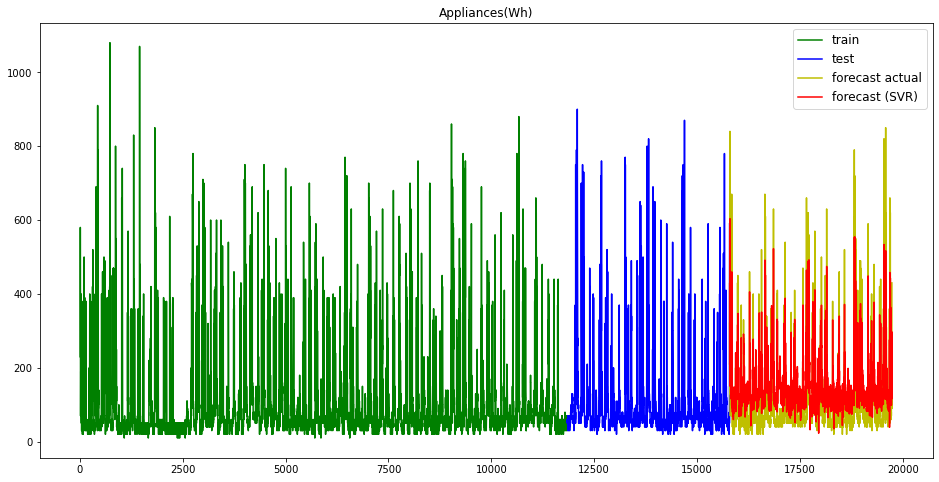

In [30]:
plt.figure(figsize=(16,8))
plt.title('Appliances(Wh)')

plt.plot(train.index,inv_ytrain[::,0],label='train',color='g')
plt.plot(test.index,inv_tytest[::,0] ,color='b',label='test')
plt.plot(forecast.index,inv_yforecast[::,0],color='y',label='forecast actual')
plt.plot(forecast.index,inv_yhat[::,0],label='forecast (SVR)',color='r')
plt.legend(fontsize = 'large')
plt.show()

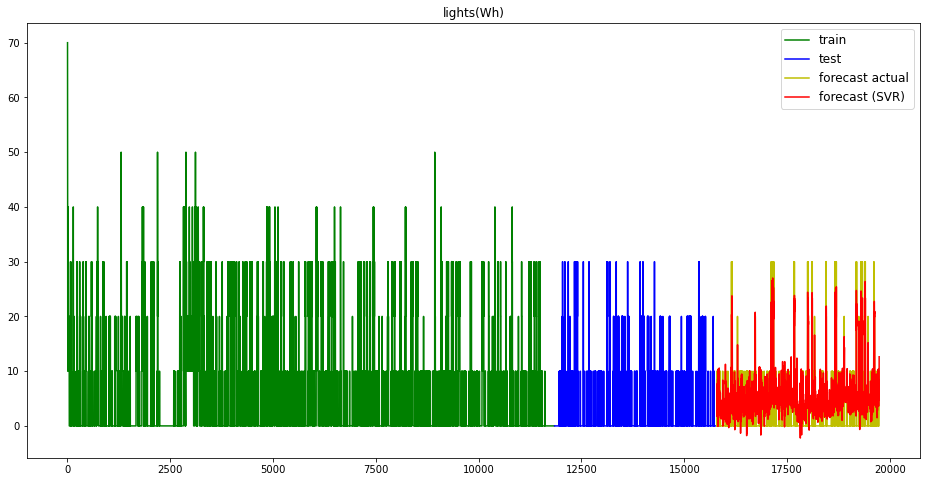

In [32]:
plt.figure(figsize=(16,8))
plt.title('lights(Wh)')

plt.plot(train.index,inv_ytrain[::,1],label='train',color='g')
plt.plot(test.index,inv_tytest[::,1] ,color='b',label='test')
plt.plot(forecast.index,inv_yforecast[::,1],color='y',label='forecast actual')
plt.plot(forecast.index,inv_yhat[::,1],label='forecast (SVR)',color='r')
plt.legend(fontsize = 'large')
plt.show()